# ggplot2 tutorial notes

In [1]:
library(tidyverse)
library(readxl)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



##  Tree

In [2]:
dta <- readxl::read_xlsx("data/Christmas tree sales.xlsx") %>%
  mutate(`Number of trees sold (millions)` = `Number of trees sold` / 1000000)

`geom_smooth()` using formula 'y ~ x'



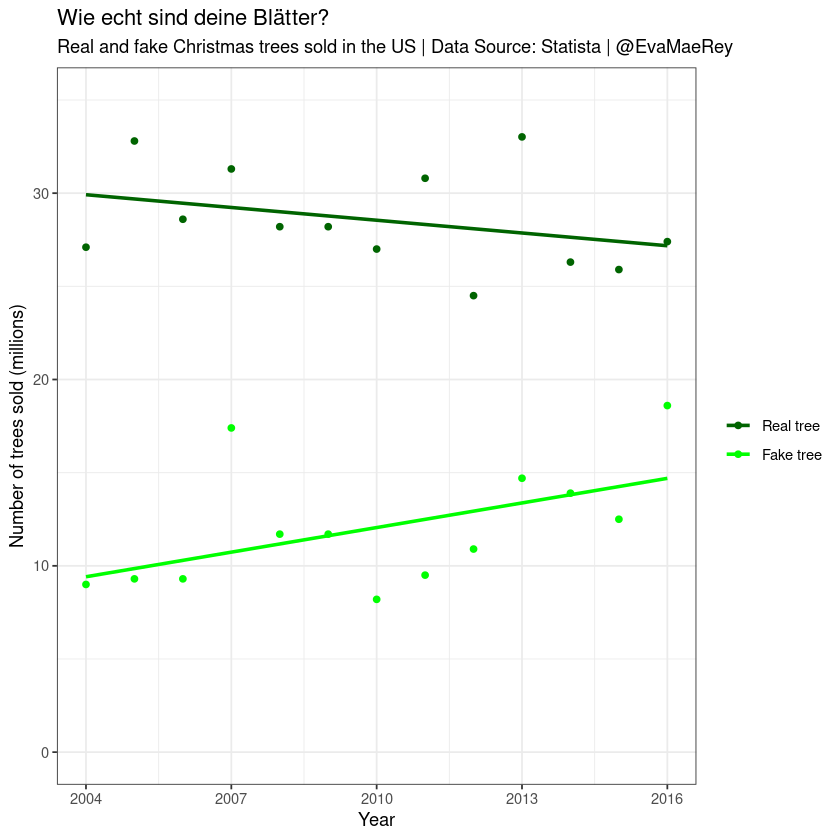

In [3]:
ggplot(data = dta) + 
    aes(x = Year) +
    aes(y = `Number of trees sold (millions)`) + 
    geom_point() + 
    aes(col = fct_rev(`Type of tree`)) +
    geom_smooth(method = "lm", se = F) +  # lm means "liner model" and se controls whether to display confidence interval
    scale_color_manual(values = c("darkgreen", "green")) + # c returns a vector
    ylim(c(0,35)) +
    labs(col="") + # removes label title

  labs(title = "Wie echt sind deine Blätter?") +
  labs(subtitle = "Real and fake Christmas trees sold in the US | Data Source: Statista | @EvaMaeRey ") +
theme_bw()

## Baseball

In [4]:
df <- readxl::read_xlsx("data/MLB Ethnicity 1947-2016.xlsx")
df_gather <- gather(df, "type", "Percent", -Year, -Ethnicity) %>%
  mutate(Percent = Percent * 100)

Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”


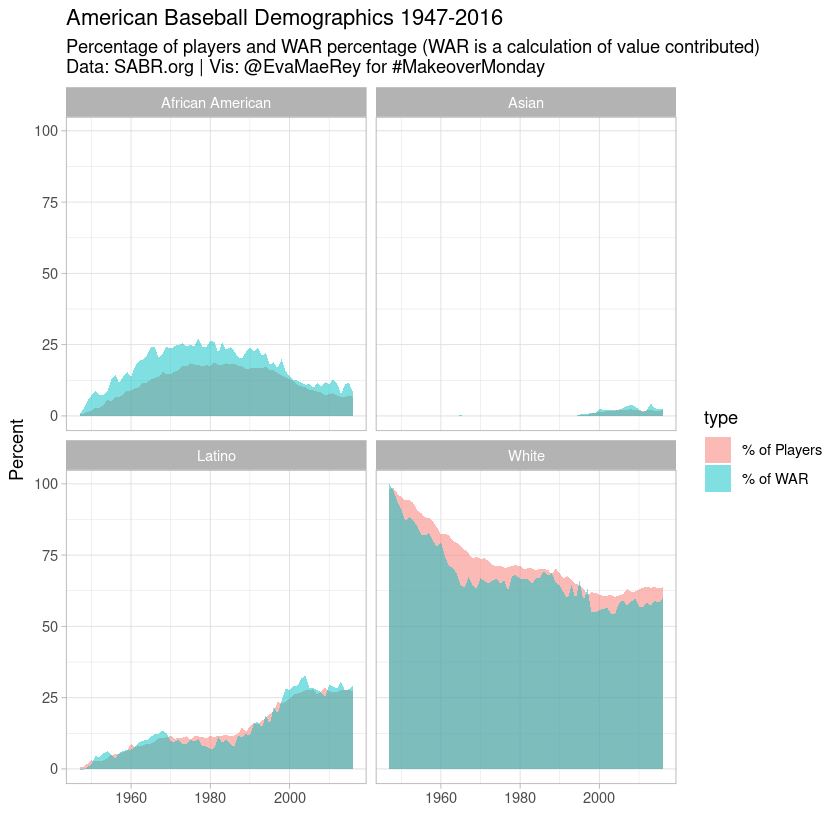

In [5]:
ggplot(df_gather) +
    aes(x = Year, y = Percent) +
    facet_wrap(~ Ethnicity) + 
    geom_area(alpha=0.5, position = "dodge") +  # position dodge shows the data on only one side
    aes(fill= type) +
  labs(x = "") +
  labs(title = "American Baseball Demographics 1947-2016") +
  labs(subtitle = "Percentage of players and WAR percentage (WAR is a calculation of value contributed)\nData: SABR.org | Vis: @EvaMaeRey for #MakeoverMonday") +
  theme_light()

## Maternity Leave

In [10]:
df <- read_xlsx("data/OECD Parental Leave system.xlsx")[-(36:45), ] %>%
  arrange(
    desc(`Total paid leave full rate equivalent in weeks`),
    desc(`Total paid leave in weeks`),
    desc(`Total paid leave avg payment rate (%)`)
  ) %>%
  mutate(rank_name = paste0("#", 1:35, ": ", Country)) %>%
  mutate(paid_leave_months = `Total paid leave in weeks` * 7 / 365 * 12) %>%
  mutate(paid_leave_months = `Total paid leave in weeks` * 7 / 365 * 12) %>%
  mutate(total_paid_yearly_salaries = `Total paid leave full rate equivalent in weeks` / 52)

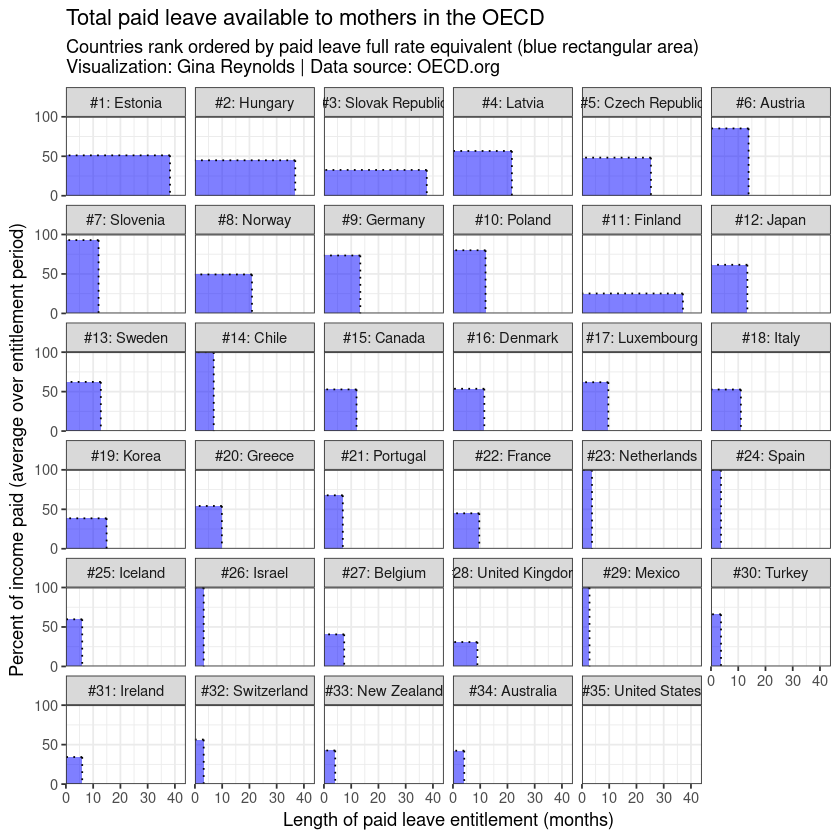

In [11]:
ggplot(df) +
    aes(x=paid_leave_months) +
  aes(y = `Total paid leave avg payment rate (%)`) +
aes(xmin = 0) +
  aes(xmax = paid_leave_months) +
  aes(ymin = 0) +
  aes(ymax = `Total paid leave avg payment rate (%)`) +
facet_wrap(fct_inorder(rank_name) ~ .) + 
  geom_rect(fill = "blue", alpha = .5) + 
aes(yend = 0) +
aes(xend = 0) +
geom_segment( aes(yend = `Total paid leave avg payment rate (%)`), lty='dotted') +
geom_segment( aes(xend = paid_leave_months), lty = "dotted") +
scale_y_continuous(limits = c(0, 100), breaks=c(0, 50, 100),  expand = c(0,0)) + # not sure what expand does
  scale_x_continuous(limits = c(0, 44), expand = c(0, 0)) + 
  labs(x = "Length of paid leave entitlement (months)") +
  labs(y = "Percent of income paid (average over entitlement period)") +
  labs(title = "Total paid leave available to mothers in the OECD") +
  labs(subtitle = "Countries rank ordered by paid leave full rate equivalent (blue rectangular area)\nVisualization: Gina Reynolds | Data source: OECD.org ") +
theme_bw(base_size = 11)  # base_size is font_size

## Traits

In [13]:
df <- readxl::read_xlsx("data/Looks vs Personality.xlsx") %>%
  mutate(country = str_replace(Nationality, "n$", "")) %>%
  mutate(country = recode(country,
    America = "USA",
    Arabia = "Saudi Arabia",
    British = "United Kingdom",
    Danish = "Denmark",
    Egyptia = "Egypt",
    Filipino = "Philippines",
    Finnish = "Finland",
    French = "France",
    Germa = "Germany",
    Norwegia = "Norway",
    Singaporea = "Singapore",
    Swedish = "Sweden",
    Thai = "Thailand",
    Vietnamese = "Vietnam"
  )) %>%
  mutate(country_name = 
           countrycode::countrycode(country, 
                                    "country.name", 
                                    "country.name")) %>%
  mutate(Percent = Percentage * 100) %>%
  mutate(
    Question_short =
      recode(Question,
        `They have a personality I like` = "Personality",
        `They have a sense of humour I like` = "Sense of humor",
        `They are intelligent` = "Intellegence",
        `They have similar interests to me` = "Has similar interests",
        `They are good looking` = "Looks",
        `They have/make a decent amount of money` = "Money"
      )
  ) %>%
  mutate(`Rank (text)`)
tmp <- df %>%
  group_by(Question, Question_short) %>%
  summarise(max = mean(Percentage * (7 - `Rank (number)`))) %>%
  arrange(-max)
df <- df %>%
  mutate(Question = factor(Question, tmp$Question)) %>%
  mutate(Question_str_wrap = factor(
    str_wrap(Question, 12),
    str_wrap(tmp$Question, 12)
  )) %>%
  mutate(Question_short_wrap = factor(
    str_wrap(Question_short, 12),
    str_wrap(tmp$Question_short, 12)
  ))
world <- df %>%
  group_by(Gender, Question_short, Question_short_wrap, `Rank (text)`, `Rank (number)`) %>%
  summarise(n = sum(Unweighted_Sample * Percentage)) %>%
  group_by(Gender, Question_short, Question_short_wrap) %>%
  mutate(Percent = 100 * n / sum(n)) %>% 
  mutate(`Rank (text)` = factor(`Rank (text)`, levels = c("Ranked sixth", "Ranked fifth", "Ranked fourth", "Ranked third", "Ranked second", "Ranked first")))
world_surved <- df %>%
  group_by(Gender, Nationality) %>%
  summarise(n = mean(Unweighted_Sample)) %>%
  group_by(Gender) %>%
  summarise(n = sum(n))

ERROR: Error: Problem with `mutate()` column `country_name`.
[34mℹ[39m `country_name = countrycode::countrycode(country, "country.name", "country.name")`.
[31m✖[39m there is no package called ‘countrycode’


In [ ]:
ggplot(data = world)